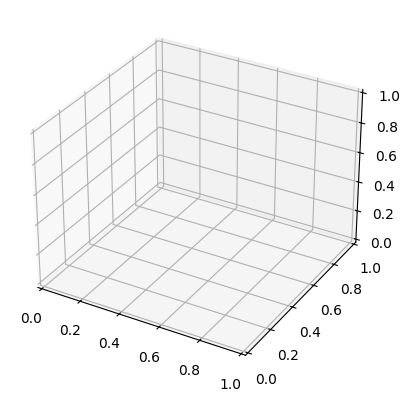

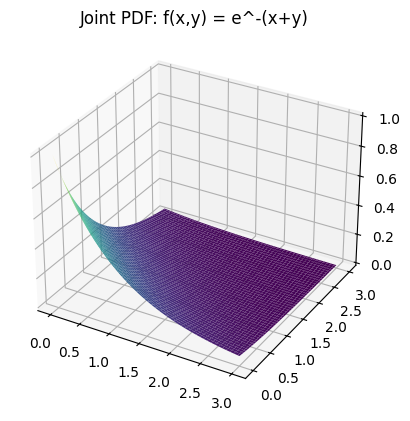

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X + Y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X + Y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Joint PDF: f(x,y) = e^-(x+y)')
plt.show()

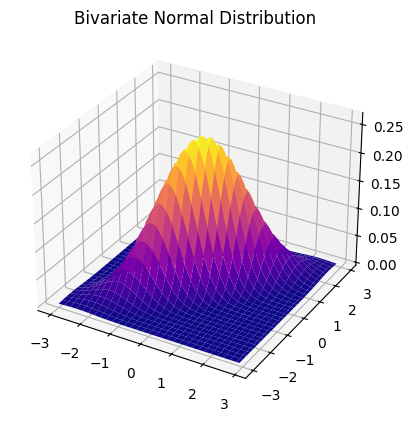

In [ ]:
from scipy.stats import multivariate_normal

mu = [0, 0]
sigma = [[1, 0.8], [0.8, 1]]
x, y = np.mgrid[-3:3:.1, -3:3:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, sigma)
Z = rv.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, Z, cmap='plasma')
ax.set_title('Bivariate Normal Distribution')
plt.show()

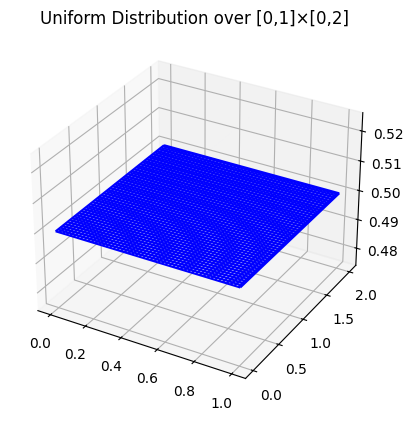

In [ ]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.full_like(X, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('Uniform Distribution over [0,1]×[0,2]')
plt.show()

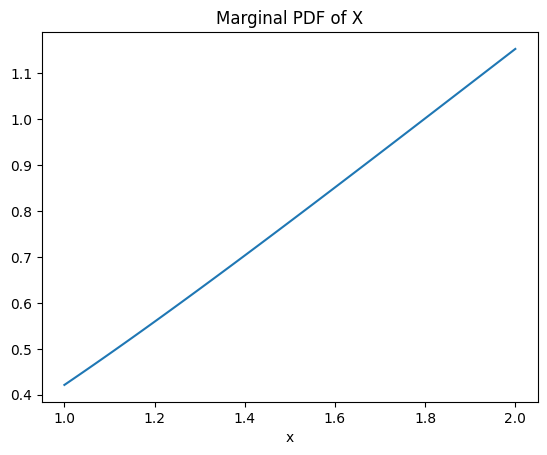

In [ ]:
from scipy.integrate import quad

def joint_pdf(x, y):
    if 1 <= x <= 2 and 0 <= y < 1:
        return (2/3) * x**2 * np.exp(-x*y)
    return 0

def f_x(x):
    return quad(lambda y: joint_pdf(x, y), 0, 1)[0]

x_vals = np.linspace(1, 2, 100)
marginal = [f_x(x) for x in x_vals]

plt.plot(x_vals, marginal)
plt.title('Marginal PDF of X')
plt.xlabel('x')
plt.show()

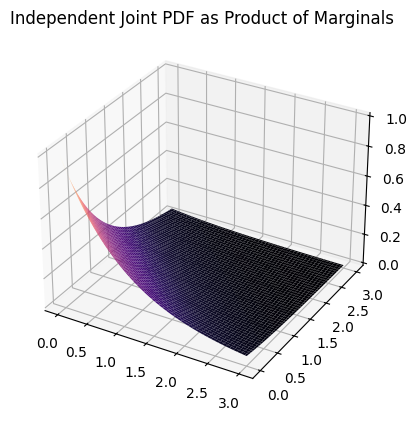

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z_ind = np.exp(-X) * np.exp(-Y)  # Product of marginals

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_ind, cmap='magma')
plt.title('Independent Joint PDF as Product of Marginals')
plt.show()

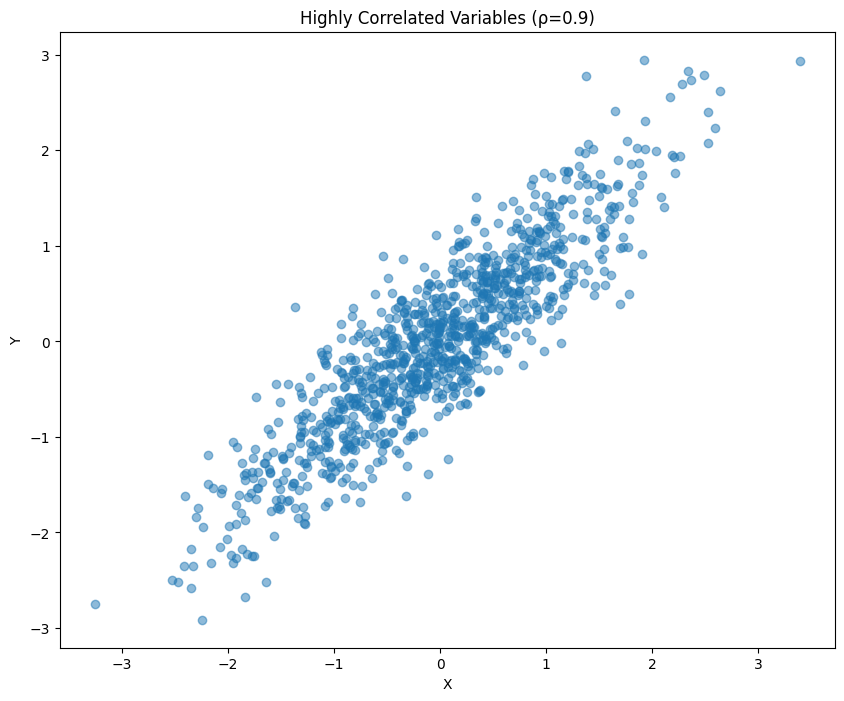

In [ ]:
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.9], [0.9, 1]], size=1000)

plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Highly Correlated Variables (ρ=0.9)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

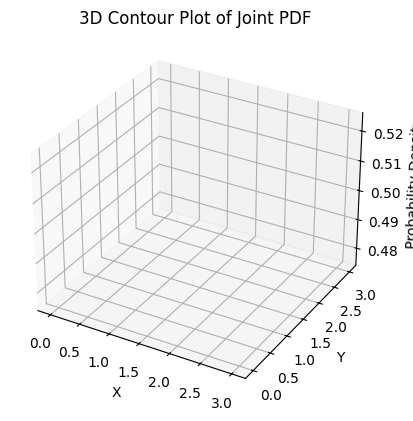

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.title('3D Contour Plot of Joint PDF')
plt.show()

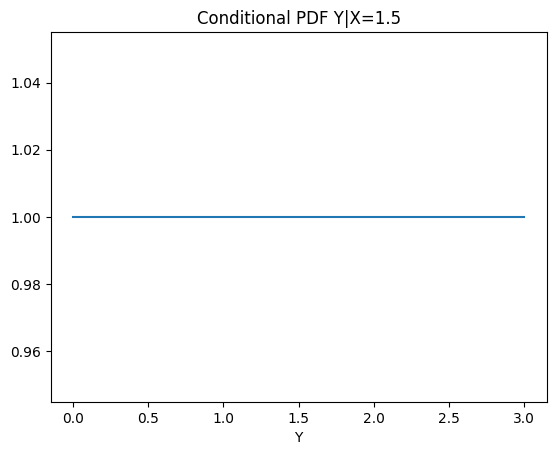

In [ ]:
cond_y = Z[50, :]/np.max(Z[50, :])

plt.plot(y, cond_y)
plt.title('Conditional PDF Y|X=1.5')
plt.xlabel('Y')
plt.show()

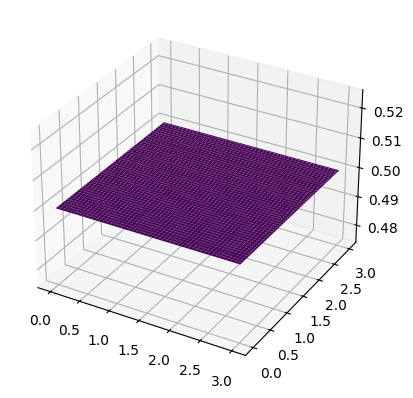

In [ ]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

def animate(i):
    ax.view_init(elev=30, azim=i*4)
    return fig,

ani = FuncAnimation(fig, animate, frames=90, interval=50)
plt.show()